In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_red = pd.read_csv("winequality-red.csv", encoding='latin-1', sep=";")
df_red_copy = df_red.copy()
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [15]:
df_white = pd.read_csv("winequality-white.csv", encoding='latin-1', sep=";")
df_white_copy = df_white.copy()
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

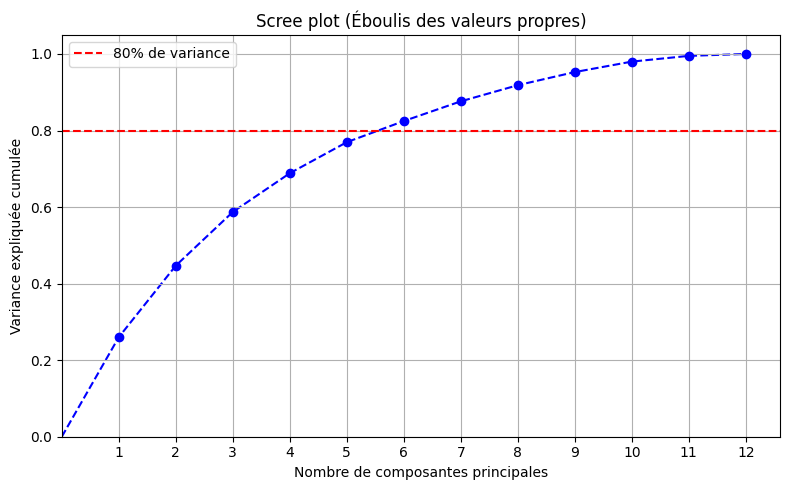

In [16]:
# --- 1. Standardisation des données ---
X_scaled = StandardScaler().fit_transform(df_red) 

pca_full = PCA().fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

# --- Calcul de la variance expliquée cumulée ---
cumulative_variance = np.cumsum(explained_variance)

# Ajouter un point 0 au début pour que l'axe des X commence à 0
cumulative_variance = np.insert(cumulative_variance, 0, 0)

# --- Graphique ---
plt.figure(figsize=(8, 5))

# Tracer la ligne sans points
plt.plot(np.arange(0, len(cumulative_variance)), cumulative_variance, linestyle='--', color='b', zorder=1)

# Ajouter des points uniquement pour les composantes supérieures à 0 (points au-dessus de la ligne)
plt.scatter(np.arange(1, len(cumulative_variance)), cumulative_variance[1:], color='b', zorder=2)

# Changer les ticks pour commencer à 1 sur l'axe des X
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))

# Ajuster les limites de l'axe Y pour qu'il commence bien à 0
plt.ylim(bottom=0)

# Ajuster aussi l'axe X pour commencer à 0
plt.xlim(left=0)

plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree plot (Éboulis des valeurs propres)')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% de variance')
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
# --- 1. Standardisation des données ---
X_scaled = StandardScaler().fit_transform(df_red.drop(columns=['quality']))  # Remplace 'df_red' par ton DataFrame

# --- 2. Appliquer l'ACP avec 6 composantes principales ---
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# --- 3. Variance expliquée par chaque composante ---
print("📈 Variance expliquée par chaque composante :")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")

# --- 5. Contributions des variables aux composantes (loadings) ---
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=df_red.drop(columns=['quality']).columns
)

rename_dict = {
    'PC1': 'Concentration Acide',
    'PC2': 'Concentration en SO₂',
    'PC3': 'Équilibre alcool-soufre',
    'PC4': 'Charge minérale',
    'PC5': 'Intensité sucrée'
}

# Exemple sur le DataFrame des loadings
loadings.rename(columns=rename_dict, inplace=True)

loadings


📈 Variance expliquée par chaque composante :
PC1: 0.282 (28.2%)
PC2: 0.175 (17.5%)
PC3: 0.141 (14.1%)
PC4: 0.110 (11.0%)
PC5: 0.087 (8.7%)


Concentration Acide  Concentration en SO₂  \
fixed acidity                    0.489314             -0.110503   
volatile acidity                -0.238584              0.274930   
citric acid                      0.463632             -0.151791   
residual sugar                   0.146107              0.272080   
chlorides                        0.212247              0.148052   
free sulfur dioxide             -0.036158              0.513567   
total sulfur dioxide             0.023575              0.569487   
density                          0.395353              0.233575   
pH                              -0.438520              0.006711   
sulphates                        0.242921             -0.037554   
alcohol                         -0.113232             -0.386181   

                      Équilibre alcool-soufre  Charge minérale  \
fixed acidity                       -0.123302        -0.229617   
volatile acidity                    -0.449963         0.078960   
citric acid                          0.238247        -0.079418   
residual sugar                       0.101283        -0.372793   
chlorides                           -0.092614         0.666195   
free sulfur dioxide                  0.428793        -0.043538   
total sulfur dioxide                 0.322415        -0.034577   
density                             -0.338871        -0.174500   
pH                                   0.057697        -0.003788   
sulphates                            0.279786         0.550872   
alcohol                              0.471673        -0.122181   

                      Intensité sucrée  
fixed acidity                -0.082614  
volatile acidity              0.218735  
citric acid                  -0.058573  
residual sugar                0.732144  
chlorides                     0.246501  
free sulfur dioxide          -0.159152  
total sulfur dioxide         -0.222465  
density                       0.157077  
pH                            0.267530  
sulphates                     0.225962  
alcohol                       0.350681

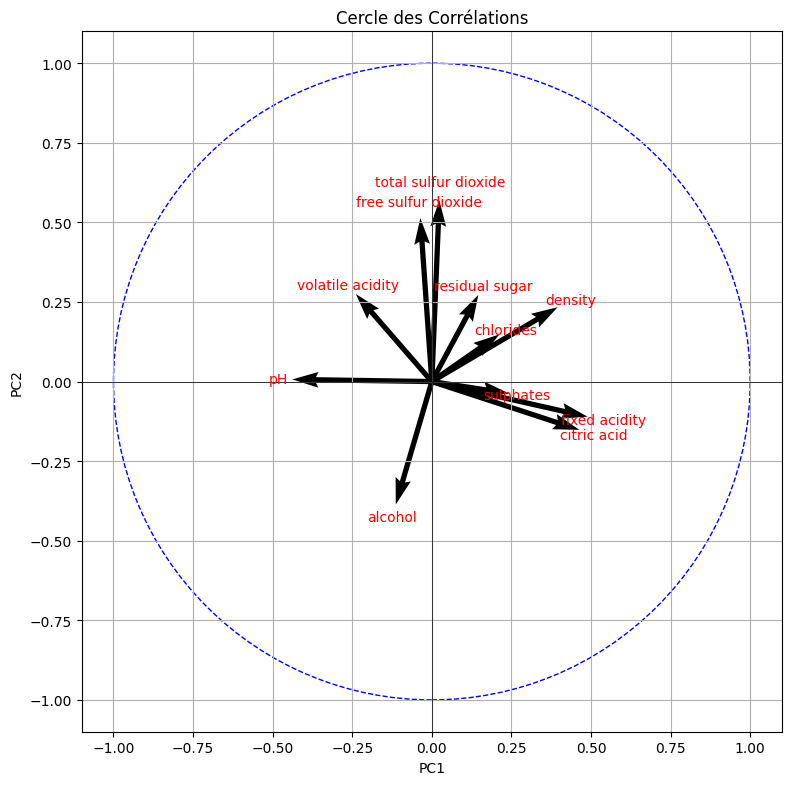

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Si tu as déjà un objet PCA de sklearn
# Refaire une ACP complète pour obtenir les loadings
pca_full = PCA().fit(X_scaled)
loadings = pca_full.components_.T  # Matrice des loadings (variables x composantes)

# --- Calcul de la variance expliquée cumulée ---
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# --- Graphique du cercle des corrélations ---
plt.figure(figsize=(8, 8))
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

# Tracer le cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Tracer les vecteurs des variables
for i in range(loadings.shape[0]):
    plt.quiver(0, 0, loadings[i, 0], loadings[i, 1], angles='xy', scale_units='xy', scale=1)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, df_red.columns[i], color='red', ha='center', va='center')

# Limiter les axes pour afficher tout le cercle
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Ajouter des titres et labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des Corrélations')

# Afficher la grille
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Afficher le graphique
plt.tight_layout()
plt.show()


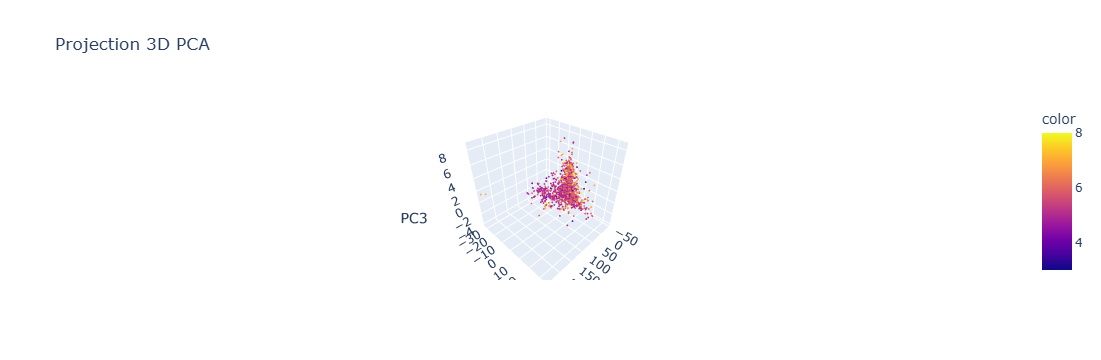

In [39]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

# Supposons que X est ton DataFrame de données brutes (features)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_red)

PCA_full = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Maintenant, tracer avec la couleur Quality venant de DF_red
fig = px.scatter_3d(
    PCA_full,
    x='PC1',
    y='PC2',
    z='PC3',
    color=df_red['quality'],  # couleur selon qualité
    title='Projection 3D PCA'
)

fig.update_traces(marker=dict(size=1))
fig.show()


In [40]:
df_white = pd.read_csv("winequality-white.csv", encoding='latin-1', sep=";")
df_white_copy = df_red.copy()
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

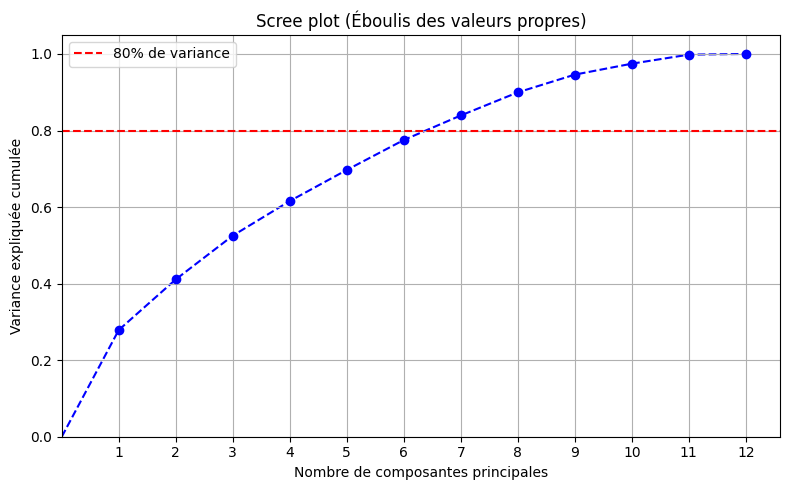

In [43]:
# --- 1. Standardisation des données ---
X_scaled = StandardScaler().fit_transform(df_white) 

pca_full = PCA().fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

# --- Calcul de la variance expliquée cumulée ---
cumulative_variance = np.cumsum(explained_variance)

# Ajouter un point 0 au début pour que l'axe des X commence à 0
cumulative_variance = np.insert(cumulative_variance, 0, 0)

# --- Graphique ---
plt.figure(figsize=(8, 5))

# Tracer la ligne sans points
plt.plot(np.arange(0, len(cumulative_variance)), cumulative_variance, linestyle='--', color='b', zorder=1)

# Ajouter des points uniquement pour les composantes supérieures à 0 (points au-dessus de la ligne)
plt.scatter(np.arange(1, len(cumulative_variance)), cumulative_variance[1:], color='b', zorder=2)

# Changer les ticks pour commencer à 1 sur l'axe des X
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))

# Ajuster les limites de l'axe Y pour qu'il commence bien à 0
plt.ylim(bottom=0)

# Ajuster aussi l'axe X pour commencer à 0
plt.xlim(left=0)

plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Scree plot (Éboulis des valeurs propres)')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% de variance')
plt.legend()
plt.tight_layout()
plt.show()
